# Text Mining: Models and Algorithms
## Homework 4: Be the Spindoctor!

Imagine you are a spindoctor for one of the UK parties. 

1) Develop a dictionary of "spin" that politicians have developed in their tweets, i.e. terms that politicians adopt to push specific issues or wordings that stick and influence the debate on an issue. Explain how you construct your dictionary and why this captures the idea of spin.

2) Apply your dictionary to the larger UK tweet repository - do you find the result satisfactory? Can you show an example of how your political party tried to push an agenda with different members of parliament at the same time?

3) Try to capture the effect of spin on interactions on twitter. Think about a regression framework that would allow you to control for confounders. This will be highly imperfect no matter what you do, given the time-span of the data, but try to do the best you can.



In [8]:
from hw4module import *

### Part 1 - constructing a dictionary 

We decided to look at tweets from the UK Labour Party to construct our dictionary. 

The corpus of tweets is over a relatively small window of time, so constructing a dictionary of political spin will be highly context specific. 

The dictionary we have extracted from the corpus is based on the 'vomit principle', where politicians repeat a term often enough for it to become part of the public discourse. In practice, this means extracting short-phrases repeated frequently by labour politicians and using those to construct a dictionary that identifies tweets that are likely to be related to spin. As we will see below, this successfully identifies some topics at the time that could be viewed as 'scandals' that the Labour party used to try and damage the Conservative party. Given the relatively limited number of tools we have developed so far and the complexity of identifying political spin without some sort of labelled dataset, this is an appropriate approximation for our dictionary.

As an additional exercise, we use media attachments as a proxy to label tweets as spin and repeat our analysis.

Overall we find under both methods that tweets labeled as spin show a large statistically signficant increase in interactions (measured as likes, quotes, retweets and replies). The results are more convincing for the dictionary, which labels a larger number of tweets as spin. The method using media attachments also showed an increase in interactions for likes and replies, though are estimates were not precise enough to say anything concrete about the other types of interactions. 

https://theconversation.com/the-vomit-principle-the-dead-bat-the-freeze-how-political-spin-doctors-tactics-aim-to-shape-the-news-106453

First, we clean up the text body of the tweets, which included removing user mentions and emojis. We then vectorize the data, extracting ngrams of length 4. This was a hyperparameter that we tuned, and lengths 4-6 identified similar events that could be characterised as spin in our corpus. 

In [9]:
print(top100_terms[0:50])

['year old suspected pneumonia', 'suspected pneumonia forced lie', 'old suspected pneumonia forced', 'theresa botched brexit deal', 'coats floor leeds hospital', 'forced lie pile coats', 'lie pile coats floor', 'pile coats floor leeds', 'pneumonia forced lie pile', 'vote labour generalelection2019 votelabourtoday', 'jack williment barr year', 'nhs nvote labour thursday', 'williment barr year old', 'barr year old suspected', 'floor leeds hospital nthe', 'hospital nthe pm grabbed', 'leeds hospital nthe pm', 'nthe pm grabbed phone', 'picture jack williment barr', 'pm grabbed phone pocket', 'tried picture jack williment', 'constituency parlipuboty view video', 'labour thursday 12 december', 'parlipuboty view video entry', 'boris johnson commit interview', 'challenge boris johnson commit', 'commit interview face questions', 'face questions people deemed', 'interview face questions people', 'interview prepared oven ready', 'issues challenge boris johnson', 'johnson commit interview face', 'j

We then took the 100 most common ngrams of length 4 and assign the dictionary as the unique words in these ngrams. The dictionary appears as a list below: 

In [3]:
print(dictionary)

['votelabourtoday', 'nigel', 'parliament', 'things', 'saying', 'ready', 'johnson', 'entry', 'forced', 'likes', 'barr', 'child', 'seven', 'working', 'member', 'say', 'free', 'britain', 'unacceptable', 'provide', 'view', 'attorney', 'paper', 'waiting', 'oven', 'longer', 'bad', 'coats', 'picture', 'come', 'votelabour', 'old', 'year', 'face', 'nandrew', 'prove', 'pocket', 'phone', 'control', 'video', 'month', 'works', 'leeds', 'save', 'pm', 'scared', 'jack', 'said', 'nhs', 'untrustworthy', 'nvote', 'december', 'nsource', 'suspected', 'fully', 'deemed', 'tried', 'legal', 'ge2019', 'saveournhs', 'knows', '14', 'poverty', 'challenge', 'matters', 'nwake', 'nit', 'late', 'congratulations', 'issues', '12', 'floor', 'elected', 'farage', 'million', 'uk', 'running', 'neil', 'constituency', 'commit', 'hospital', 'denial', 'williment', 'nthe', 'lists', 'rough', 'brexit', 'doesn', 'state', 'advice', 'years', 'just', 'door', 'grabbed', 'statsofshame', 'country', 'mr', 'general', 'botched', 'today', 'bo

### Part 2 - apply dictionary to corpus

We extracted tweets at least one word in the spin dictionary is matched the body of the tweet. Some examples of matches appear below.

The first example relates to a scandal where a photo emerged of a sick boy lying on the floor of a hospital for hours while waiting to be attended by doctors. The Labour party used this incident to attack Tories on the quality of the NHS. The issue is a good example of political spin because it was alleged that the photo was faked.

The second example below relates to the 'Theresa May's botched Brexit deal', which is a clear example of alliterative spin.

In [10]:
eg_child_hospital = [any(item in i for item in ['pneumonia', 'coat', 'floor', 'lie']) for i in demojized_text_split]
tweets_child_floor = uk_data[eg_child_hospital]
list(tweets_child_floor['demojized_text'])

['@usermention That’s a complete lie - the people losing are my friends and #labourfamily. Please don’t insult my staff by saying such things because you disagree with me politically.',
 'This is for our children forced to lie on hospital floors.\\n\\nThis is for Grenfell.\\n\\nThis is for the homeless sleeping out in the cold.\\n\\nThis is for our NHS.\\n\\nThis is for our planet that is crying out to be rescued.\\n\\nThis is for you. \\n\\n#VoteLabour',
 'Oh fuck. This is nuclear.\\n\\nThe BBC have just reported that the Tory Health Secretary was friends with family linked to the fake news scandal surrounding baby Jack, the 4 year old suffering pneumonia lying on a hospital floor. [url]',
 'If you don’t believe a 4-year old boy would have to lie down on an A&E floor then this thread is for you. \\n\\n1) The four hour target for patients to be seen, treated and transferred hasn’t been met in years and is at its worst ever. [url]',
 "Pretty monstrous to accuse the parents of a sick fou

In [11]:
eg_brexit = [any(item in i for item in ['brexit', 'botched', 'theresa']) for i in demojized_text_split]
tweets_brexit = uk_data[eg_brexit]
list(tweets_brexit['demojized_text'])

['Who put the return of no deal brexit - and all the chaos that entails- on their Christmas list? Suggests this government not going to use their majority to be sensible but to be vindictive … #brexithaos [url]',
 'Plus you need to offer hope to the ordinary working person and boost his pay packet that is still buying 5% less than it did in 2008 - @usermention had nothing to offer to contrast the stupid but effective ‘get brexit done’ you have to be believable again [url]',
 'NEW - Leaked Treasury document, here in full, which suggests potential checks on goods going to/ from NI under Boris Johnson’s brexit deal include[emoji]',
 'NEW - Leaked Treasury document, here in full, which suggests potential checks on goods going to/ from NI under Boris Johnson’s brexit deal include[emoji]',
 'At Cardiff South and Penarth hustings with @usermention and @usermention No show from tories or brexit mob yet [url]',
 '@usermention @usermention @usermention @usermention @usermention @usermention @use

Here the task is to analyse how the party and it's members try to push a certain event. Of course one could have looked into specific words used, but we decided to do a simple sentiment analysis given the difference of the events. We look at all the tweets that contain the 'spin' words for the above events and assign them a sentiment score on a negative-to-positive scale. 

In [12]:
from afinn import Afinn
af = Afinn()
# compute sentiment scores (polarity) and labels
sentiment_scores1 = [af.score(tweet) for tweet in tweets_child_floor['demojized_text']]
sentiment_scores2 = [af.score(tweet) for tweet in tweets_brexit['demojized_text']]

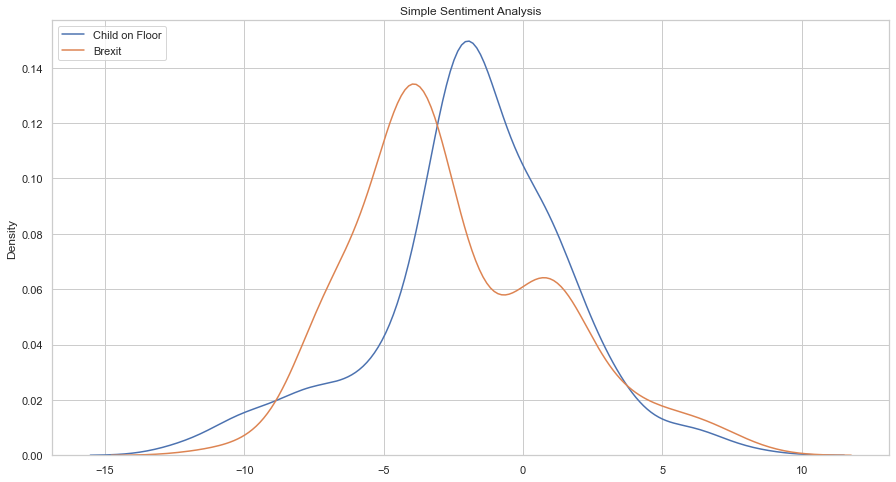

In [13]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.kdeplot(sentiment_scores1)
sns.kdeplot(sentiment_scores2)
plt.title('Simple Sentiment Analysis')
plt.legend(loc='upper left', labels = ['Child on Floor', 'Brexit'])

While the distribution of the two sentiment scores is quite similar, Brexit seems to be more negative perceived than the child on the floor event. Given that the picture of child on the floor was allegedly faked, members of the labour party might have been more cautions in their expression compared to talking about Brexit. Also because a child was involved, potentially more often words that could be classified as neutral were used, in comparison to Brexit. 

### Part 3 - Effect of spin on interactions on twitter

Using our dictionary we label tweets as spin by adding an indicator variable to the data set. As an alternative approach, we also classify tweets as spin if they include a media attachment and construct a separate indicator variable for this. We also use variations of dictionary, using quad-grams as dictionary terms and using terms exclusively used by the Labour party.

Using these proxies for spin, we build a regression model to measure the level of association between 'spin tweets' ($Spin_i == 1$) and the amount of activity the tweet creates. We have decided to introduce the spin as a binary indictor instead of a  continuous variable (i.e., an index), as we deem that it makes more sense that a person who makes the tweets decide whether his/her tweet would be spinned or not, and not how spinned it would be. In addition, we focus on the likes to measure interactions as it is the most popular interaction among users. However, we also repeat our analysis on other measures of interaction like quotes, replies and retweets.

Controls in our regression include the number of hashtags in the tweet ($Hashtags_i$), the length of the tweet ($Length_i$), the number of followers ($Followers_i$) of the politician and separate variables for the hour ($Hour_i$) and weekday ($Day_i$) of posting.

Our regression model is expressed as:

$$ln(interaction_{Ci}) = \beta_0 + \beta_1 Spin_{Pi} + \beta_2 Hashtags_i + \beta_3 Length_i + \beta_4 Followers_i + \beta_5 Hour_i + \beta_6 Day_i$$


The $C$ interaction types include:
- Likes
- Retweets
- Quotes
- Replys

Indicators of spin content $P$ includes:
- matching a spin word
- media attachment

The most popular politicians tend to have a higher number of interactions, which leads to correlated residuals within the cluster of tweets posted by a given politician. To address this problem, we use a cluster robust OLS model where the cluster identifier is the politician username.

#### Spin indicator 1 - Matching at least one spin word (using the dictionary)

Using our dictionary of 136 words to classify tweets as spin gives a total of 16.763 tweets (41%) labeled as spin. This classification method is positively correlated with the amount of activity associated with a tweet. We can see this in the plot below, which compares the median number of interactions for tweets classified as spin or not spin.

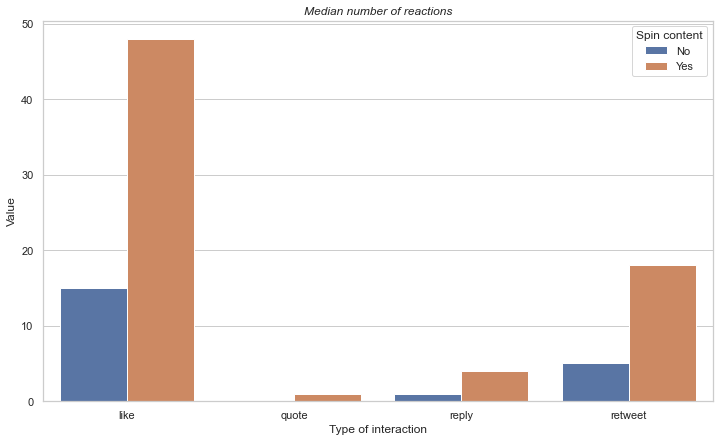

In [6]:
metrics_plot(uk_data_spin, 'dictionary_spin')

In [7]:
controls = ['hashtags_counts', 'tweet_length', 'author.public_metrics.followers_count', 'created_at_week_day', 'created_at_hour']

Next, we run our cluster robust OLS regressions with the controls mentioned above. We run four regressions - one for each type of interaction. On average, tweets labelled as spin by our dictionary generated around a third more likes and quotes. Replies and reweets increased by around a half. In all of the regressions, our spin indicator was highly statistically significant. 

For brevity, we only show the full regression results for one model and one interaction indicator. For the others, we only show the coefficient and p-value of the spin indicator.

In [8]:
run_cluster_Robust_OLS_full(uk_data_spin, 'public_metrics.like_count', ['dictionary_spin'], controls, 'author.username')

                                OLS Regression Results                               
Dep. Variable:     public_metrics.like_count   R-squared:                       0.102
Model:                                   OLS   Adj. R-squared:                  0.101
Method:                        Least Squares   F-statistic:                     27.67
Date:                       Fri, 25 Feb 2022   Prob (F-statistic):           9.04e-52
Time:                               12:52:41   Log-Likelihood:                -59791.
No. Observations:                      31287   AIC:                         1.196e+05
Df Residuals:                          31259   BIC:                         1.199e+05
Df Model:                                 27                                         
Covariance Type:                     cluster                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

As we can observe from the full regression results above, hashtag counts, tweet length, the number of followers a user has, the time and day the tweets was posted affects the interactions it gets. However, the spin indictor has is the highest statistical significance and highest magnitude. Relative to non-spinned tweets, a spinned tweet gets 34% more likes.

In [9]:
results_11 = run_cluster_Robust_OLS(uk_data_spin, 'public_metrics.like_count', ['dictionary_spin'], controls, 'author.username')

Robust cluster OLS over 31287 observations using public_metrics.like_count as target. On average the interactions increased 34.75% (p-value = 0.0). R2 = 0.101


In [10]:
results_12 =run_cluster_Robust_OLS(uk_data_spin, 'public_metrics.quote_count', ['dictionary_spin'], controls, 'author.username')

Robust cluster OLS over 21002 observations using public_metrics.quote_count as target. On average the interactions increased 33.85% (p-value = 0.0). R2 = 0.048


In [11]:
results_13 = run_cluster_Robust_OLS(uk_data_spin, 'public_metrics.reply_count', ['dictionary_spin'], controls, 'author.username')

Robust cluster OLS over 28654 observations using public_metrics.reply_count as target. On average the interactions increased 48.4% (p-value = 0.0). R2 = 0.067


In [12]:
results_14 =run_cluster_Robust_OLS(uk_data_spin, 'public_metrics.retweet_count', ['dictionary_spin'], controls, 'author.username')

Robust cluster OLS over 29873 observations using public_metrics.retweet_count as target. On average the interactions increased 44.84% (p-value = 0.0). R2 = 0.084


#### Spin indicator 2 - labelling tweets with media attachments as spin

Tagging tweets based on the inclusion of a media attachments classified 7538 (18%) tweets as spin. Similar to with our dictionary, tweets tagged as spin under this method show increased interactions (see plot below).
We choose this method after some manual investigation in the twittersphere. When looking at political parties and their politicians, if they attach a picture or video to a tweet, this tweet is very likely to be spin. First of all, using visual elements can create stronger emotional reactions, thus being destined for spin. Also videos can easily be cut, so essentially shaping an out-of-context source of information, tailored to the desired effect of the political party, while remaining some form of source validity (like a video from the house of commons). 
In general the idea evolved out of diffuculties in defining spin. Essentially many different forms of language can be used as spin, and detecting those up to an abstract definition of 'political spin' is beyond our current skill level. That's why we tried to bypass these difficulties with a different approach, which eventually could be used to extract text structures from tweets classified as spin. But in order to test this method, we would need labelled spin training data.

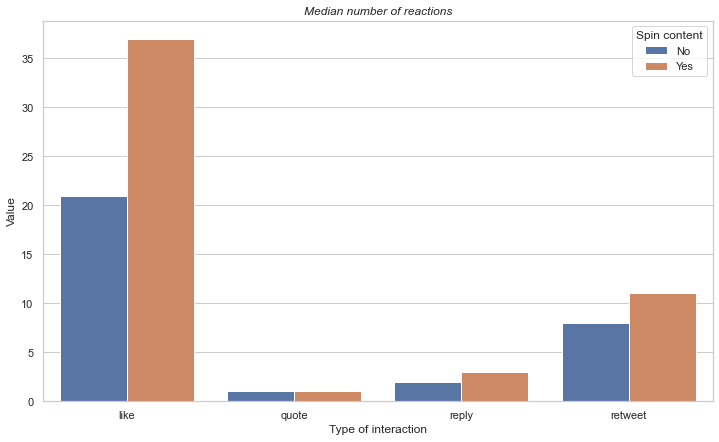

In [13]:
metrics_plot(uk_data_spin, 'media_spin')

The resuls of our regressions here are less conclusive than under the dictionary method.

Spin tweets here saw on average 50 per cent more likes and 20 per cent more replies than other tweets. Both of these coefficients are highly statistically significant. 

On the other hand, the coefficients for quotes and retweets were not statistically significant. Less precise estimates here could be due to the smaller sample of tweets under this method tagged as spin.

In [14]:
results_21 = run_cluster_Robust_OLS(uk_data_spin, 'public_metrics.like_count', ['media_spin'], controls, 'author.username')

Robust cluster OLS over 31287 observations using public_metrics.like_count as target. On average the interactions increased 48.85% (p-value = 0.0). R2 = 0.105


In [15]:
results_22 = run_cluster_Robust_OLS(uk_data_spin, 'public_metrics.quote_count', ['media_spin'], controls, 'author.username')

Robust cluster OLS over 21002 observations using public_metrics.quote_count as target. On average the interactions increased -9.13% (p-value = 0.159). R2 = 0.042


In [16]:
results_23 = run_cluster_Robust_OLS(uk_data_spin, 'public_metrics.reply_count', ['media_spin'], controls, 'author.username')

Robust cluster OLS over 28654 observations using public_metrics.reply_count as target. On average the interactions increased 18.96% (p-value = 0.003). R2 = 0.056


In [17]:
results_24 = run_cluster_Robust_OLS(uk_data_spin, 'public_metrics.retweet_count', ['media_spin'], controls, 'author.username')

Robust cluster OLS over 29873 observations using public_metrics.retweet_count as target. On average the interactions increased -4.45% (p-value = 0.422). R2 = 0.073


#### Spin indicator 3 - Matching at least one spin quad-gram (using the dictionary)

Using our dictionary of 100 quad-grams to classify tweets as spin gives a total of 437 tweets (1.07%) labeled as spin. Using full quadgrams may be too restrictive, hence resulting a highly imbalanced dataset.

In [18]:
print(top100_terms[0:10])

['year old suspected pneumonia', 'suspected pneumonia forced lie', 'old suspected pneumonia forced', 'theresa botched brexit deal', 'coats floor leeds hospital', 'forced lie pile coats', 'lie pile coats floor', 'pile coats floor leeds', 'pneumonia forced lie pile', 'vote labour generalelection2019 votelabourtoday']


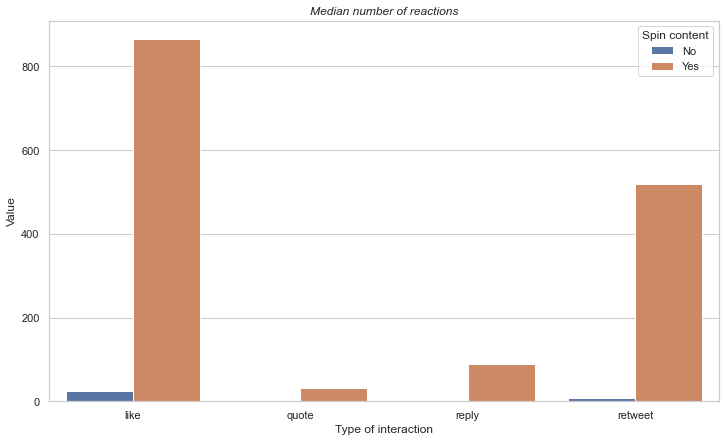

In [19]:
metrics_plot(uk_data_spin, 'dictionary_spin_quad')

In [20]:
results_31 = run_cluster_Robust_OLS(uk_data_spin, 'public_metrics.like_count', ['dictionary_spin_quad'], controls, 'author.username')

Robust cluster OLS over 31287 observations using public_metrics.like_count as target. On average the interactions increased 101.22% (p-value = 0.0). R2 = 0.095


In [21]:
results_32 = run_cluster_Robust_OLS(uk_data_spin, 'public_metrics.quote_count', ['dictionary_spin_quad'], controls, 'author.username')

Robust cluster OLS over 21002 observations using public_metrics.quote_count as target. On average the interactions increased 130.37% (p-value = 0.0). R2 = 0.048


In [22]:
results_33 = run_cluster_Robust_OLS(uk_data_spin, 'public_metrics.reply_count', ['dictionary_spin_quad'], controls, 'author.username')

Robust cluster OLS over 28654 observations using public_metrics.reply_count as target. On average the interactions increased 92.49% (p-value = 0.0). R2 = 0.057


In [23]:
results_34 = run_cluster_Robust_OLS(uk_data_spin, 'public_metrics.retweet_count', ['dictionary_spin_quad'], controls, 'author.username')

Robust cluster OLS over 29873 observations using public_metrics.retweet_count as target. On average the interactions increased 145.48% (p-value = 0.0). R2 = 0.077


#### Spin indicator 4 - Matching at least one spin word (using the labour dictionary)

Using our dictionary of 98 words to classify tweets as spin gives a total of 11.046 tweets (27%) labeled as spin.

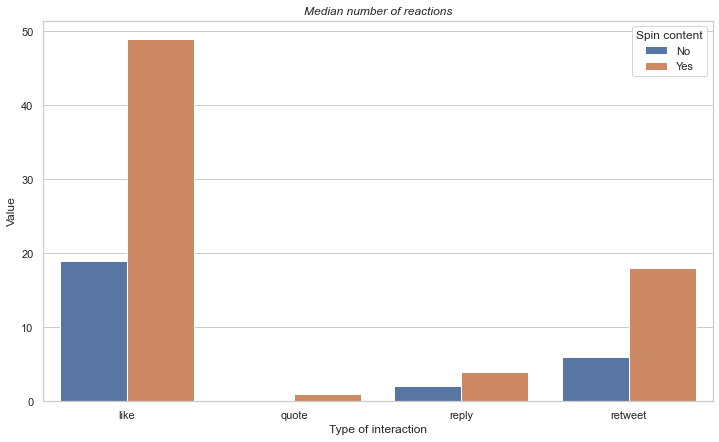

In [24]:
metrics_plot(uk_data_spin, 'dictionary_labour_spin')

In [25]:
results_41 = run_cluster_Robust_OLS(uk_data_spin, 'public_metrics.like_count', ['dictionary_labour_spin'], controls, 'author.username')

Robust cluster OLS over 31287 observations using public_metrics.like_count as target. On average the interactions increased 20.32% (p-value = 0.0). R2 = 0.095


In [26]:
results_42 =run_cluster_Robust_OLS(uk_data_spin, 'public_metrics.quote_count', ['dictionary_labour_spin'], controls, 'author.username')

Robust cluster OLS over 21002 observations using public_metrics.quote_count as target. On average the interactions increased 29.35% (p-value = 0.0). R2 = 0.046


In [27]:
results_43 = run_cluster_Robust_OLS(uk_data_spin, 'public_metrics.reply_count', ['dictionary_labour_spin'], controls, 'author.username')

Robust cluster OLS over 28654 observations using public_metrics.reply_count as target. On average the interactions increased 38.21% (p-value = 0.0). R2 = 0.062


In [28]:
results_44 =run_cluster_Robust_OLS(uk_data_spin, 'public_metrics.retweet_count', ['dictionary_labour_spin'], controls, 'author.username')

Robust cluster OLS over 29873 observations using public_metrics.retweet_count as target. On average the interactions increased 33.11% (p-value = 0.0). R2 = 0.078
